In [1]:
import pandas as pd
# Load the dataset from the path
Titanic_dataset = pd.read_csv("C://CODSOFT/Titanic_Survival_Prediction/Titanic-Dataset.csv")

In [2]:
# Display the first five rows
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Starting EDA(exploratory data analysis)
# Describe dataset statistics
print(Titanic_dataset.describe())
# Check for basic info
print(Titanic_dataset.info())
# check for the missing values
print(Titanic_dataset.isna().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [4]:
# Fill in the missing values
Titanic_dataset.loc[:, "Age"] = Titanic_dataset["Age"].fillna(Titanic_dataset["Age"].mean())
Titanic_dataset.loc[:, "Embarked"] = Titanic_dataset["Embarked"].fillna(Titanic_dataset["Embarked"].mode()[0])

In [5]:
# Check for duplicate values
print(Titanic_dataset.duplicated().sum())


0


In [6]:
# Check datatypes
print(Titanic_dataset.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
# Drop unnecessary columns to predict
columns_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]
existing_columns = [col for col in columns_to_drop if col in Titanic_dataset.columns]
Titanic_dataset = Titanic_dataset.drop(columns = existing_columns)

In [8]:
# Encode categorial value
Titanic_dataset["Sex"] = Titanic_dataset["Sex"].map({"male" : 0, "female" : 1})

In [9]:
# One- Hot Encoding the "Embarked" col.
Titanic_dataset = pd.get_dummies(Titanic_dataset, columns=["Embarked"], drop_first= True)

In [10]:
# View Updated dataset
print(Titanic_dataset.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [11]:
# scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Titanic_dataset[["Age", "Fare"]] = scaler.fit_transform(Titanic_dataset[["Age", "Fare"]])

In [12]:
#splitting dataset into train-test
#Features
X = Titanic_dataset.drop("Survived", axis=1)
# Target Variable
y = Titanic_dataset["Survived"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Training the model
# import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100,class_weight="balanced", random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [14]:
# Evaluate the model
y_pred = model.predict(X_test)
# check for the accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [15]:
#print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



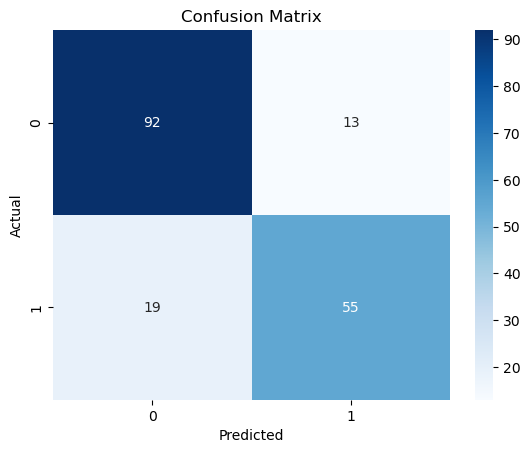

In [16]:
# Create a confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = { 
    "n_estimators": [50, 100, 200],
     "max_depth":[None, 10, 20],
     "min_samples_split": [2, 5, 10],
     "min_samples_leaf": [1, 2, 4]
                         }

In [18]:
# initialize model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
# perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose= 2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [19]:
# best parameters
from sklearn.model_selection import GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [20]:
# Best Model
from sklearn.model_selection import GridSearchCV
best_model = grid_search.best_estimator_
# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))

Optimized Accuracy: 0.8156424581005587


In [21]:
# compare different models
# install XGBoost 
%pip install xgboost
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
# initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}


Note: you may need to restart the kernel to use updated packages.


In [22]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accur = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accur:.4f}")
best_model = models["Random Forest"]

Random Forest Accuracy: 0.8212
Logistic Regression Accuracy: 0.8101
SVM Accuracy: 0.8156


c:\Users\GADMAP\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:11:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7877


In [23]:
from sklearn.metrics import precision_recall_curve
import numpy as np

y_probs = best_model.predict_proba(X_test)[:, 1]  # Get probabilities
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

best_threshold = thresholds[np.argmax(recalls >= 0.8)]  # Adjust for high recall
y_pred_new = (y_probs >= best_threshold).astype(int)


In [24]:
import joblib
# Save the best model
joblib.dump(best_model, "Titanic_dataset_model.pkl")
# load the model ; for future use
loaded_model = joblib.load("Titanic_dataset_model.pkl")
# make predictions using the saved model
new_predictions = loaded_model.predict(X_test)


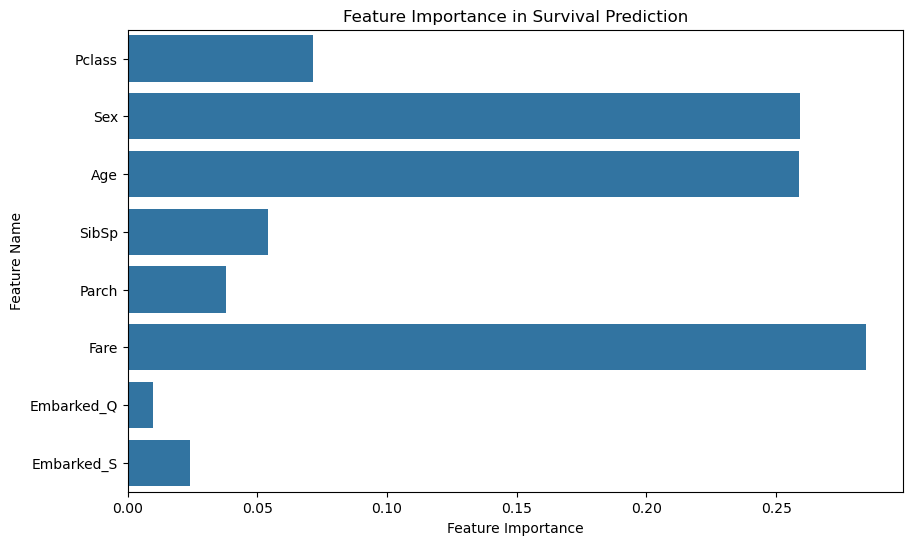

In [25]:
# visualizing 
# feature importance
importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance in Survival Prediction")
plt.show()

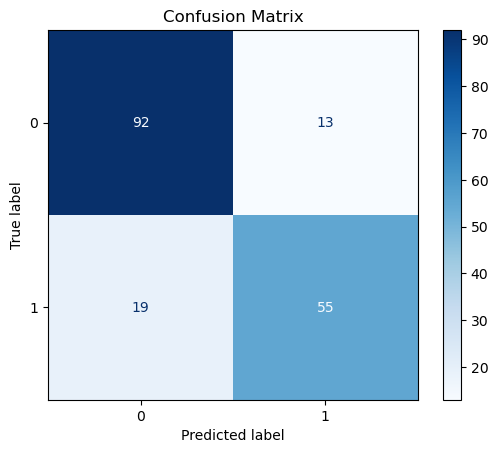

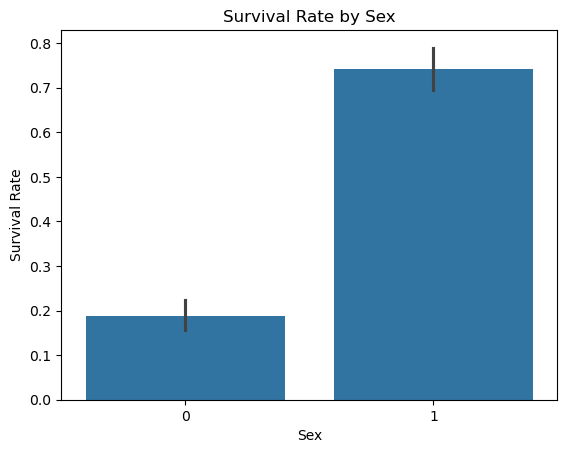

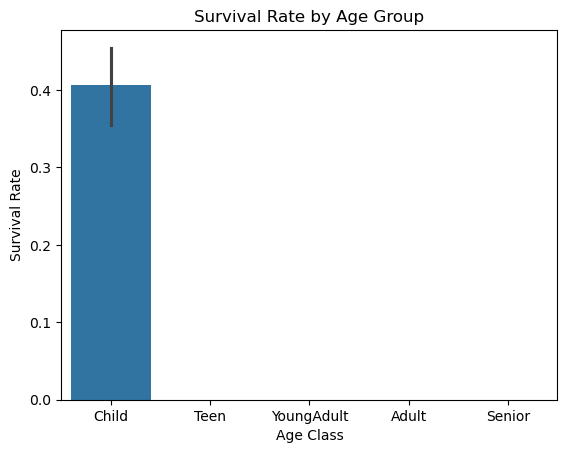

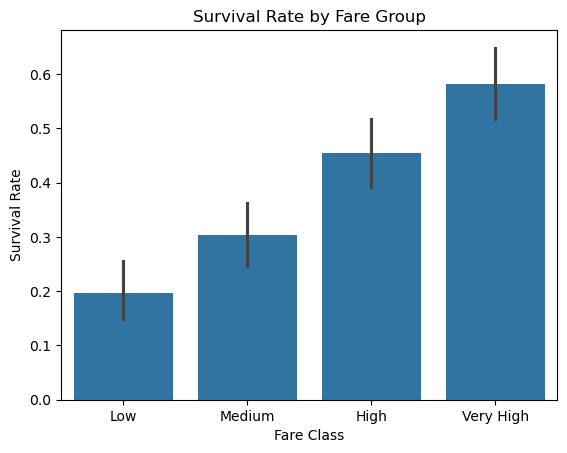

In [27]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()
# survival Rate by different groups
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of survival rate by Sex
sns.barplot(x="Sex", y="Survived", data=Titanic_dataset)
plt.title("Survival Rate by Sex")
plt.xlabel("Sex")
plt.ylabel("Survival Rate")
plt.show()
# Barplot of survival rate by Age
Titanic_dataset["Age"] = pd.cut(Titanic_dataset["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"])
sns.barplot(x="Age", y="Survived", data=Titanic_dataset)
plt.xlabel("Age Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Age Group")
plt.show()
# Barplot of survival rate by Fare
Titanic_dataset["Fare"] = pd.qcut(Titanic_dataset["Fare"], q=4, labels=["Low", "Medium", "High", "Very High"])
sns.barplot(x="Fare", y="Survived", data=Titanic_dataset)
plt.xlabel("Fare Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Fare Group")
plt.show()

